## Assignment 1
> ##### *Matplotlib Problems*


#### *3.1 Whatis the distribution of miles per gallon (mpg) in the dataset?*
Plot a histogram of mpg values.

In [ ]:
import pandas as pd
pd.read_csv('auto-mpg (1).csv')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


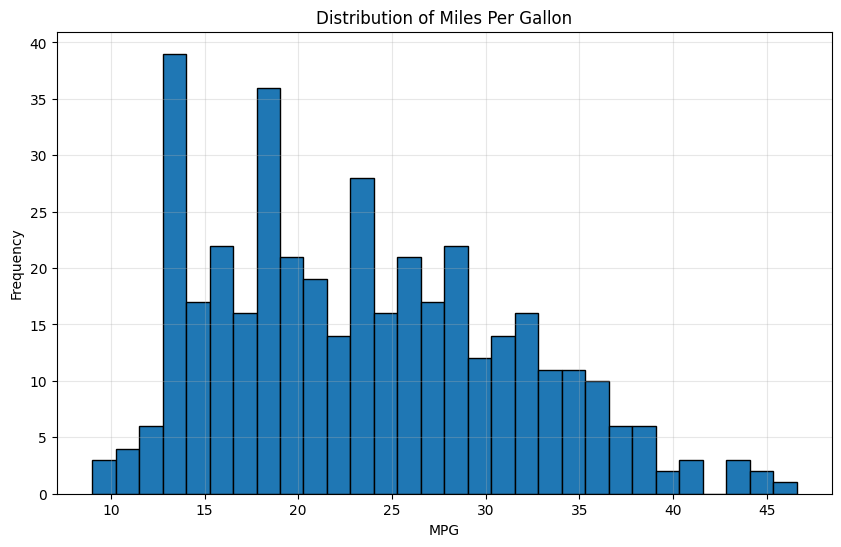

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['mpg'], bins=30, edgecolor='black')
plt.title('Distribution of Miles Per Gallon')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

#### *3.2 How does mpg vary with the number of cylinders?*
Use a boxplot to compare mpg across different cylinders.

/tmp/ipykernel_11703/402313663.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data.cylinders == i]['mpg'] for i in sorted(data.cylinders.unique())],


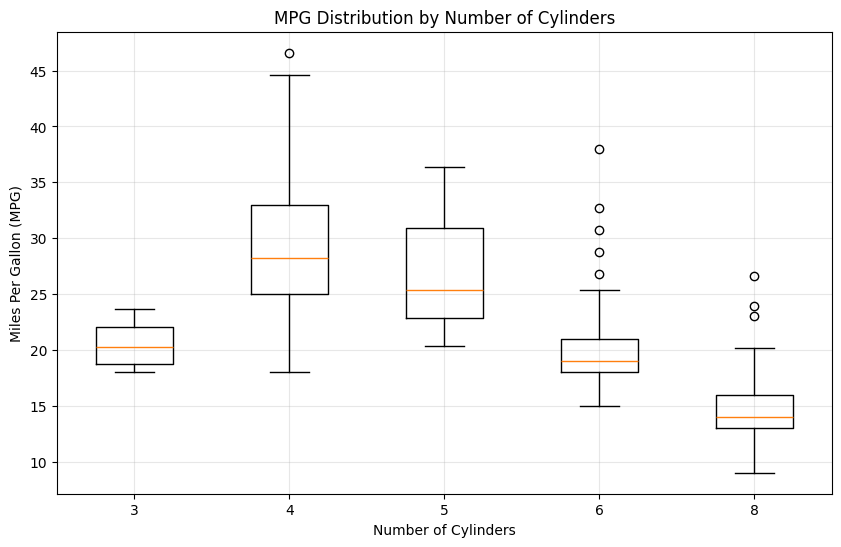

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data.cylinders == i]['mpg'] for i in sorted(data.cylinders.unique())],
            labels=sorted(data.cylinders.unique()))
plt.title('MPG Distribution by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True, alpha=0.3)
plt.show()

#### *3.3 Is there a relationship between horsepower and mpg? Summarize your observation* Plota scatter plot of horsepower vs mpg

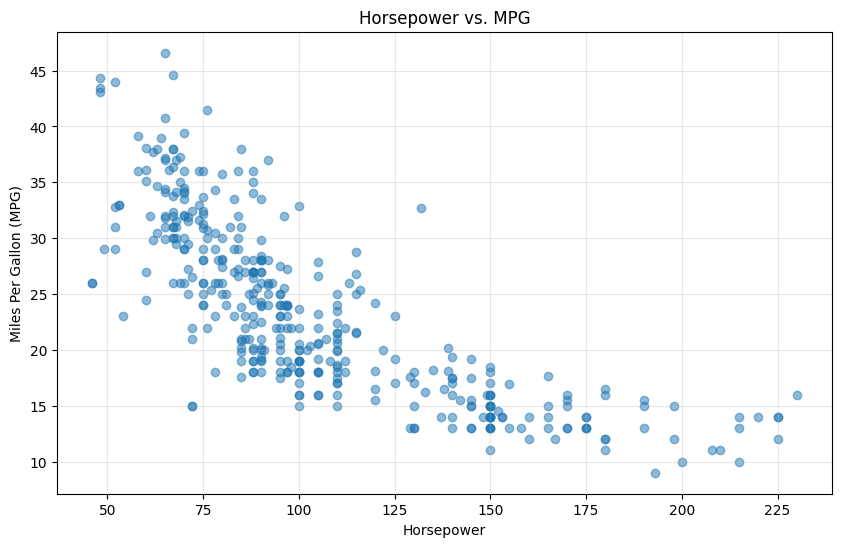

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(data['horsepower'], data['mpg'], alpha=0.5)
plt.title('Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True, alpha=0.3)
plt.show()

#### *3.4 How does car weightinfluence mpg?*
Plot a scatter plot with a trend line for weight vs. mpg.

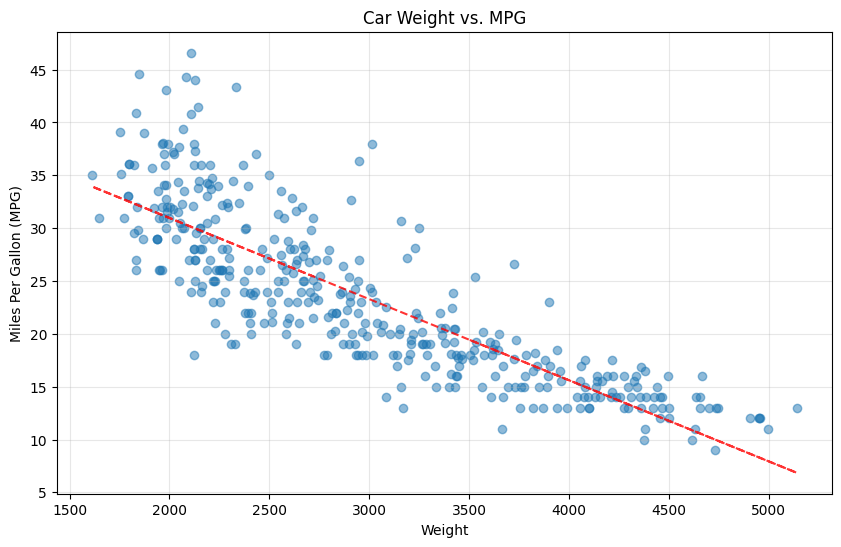

In [20]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(data['weight'], data['mpg'], alpha=0.5)

z = np.polyfit(data['weight'], data['mpg'], 1)
p = np.poly1d(z)
plt.plot(data['weight'], p(data['weight']), "r--", alpha=0.8)

plt.title('Car Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True, alpha=0.3)
plt.show()

#### 3.5 Whatis the trend of average mpg across model years?
Plot a line chart of average mpg per model year.

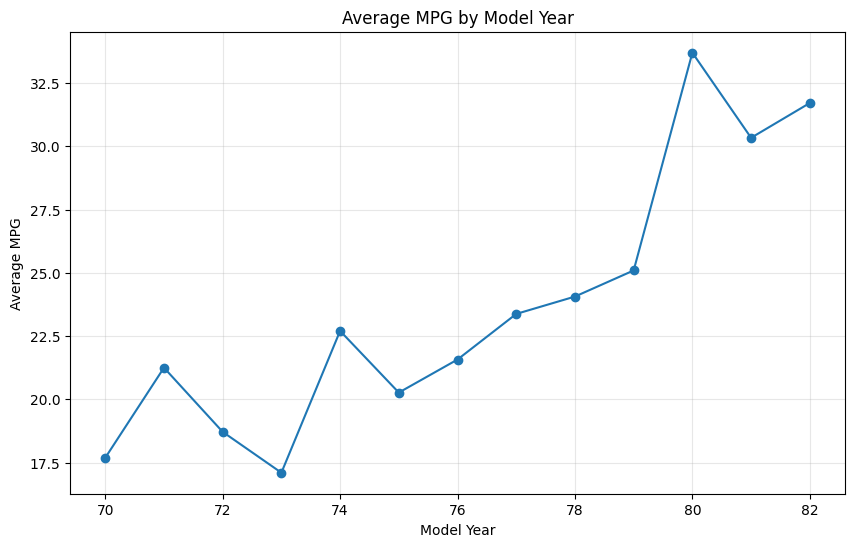

In [21]:
avg_mpg_by_year = data.groupby('model year')['mpg'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, marker='o')
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.show()

#### 3.6 How is the count of cars distributed by origin?
Use a bar chart to show the number of carsfor each origin.

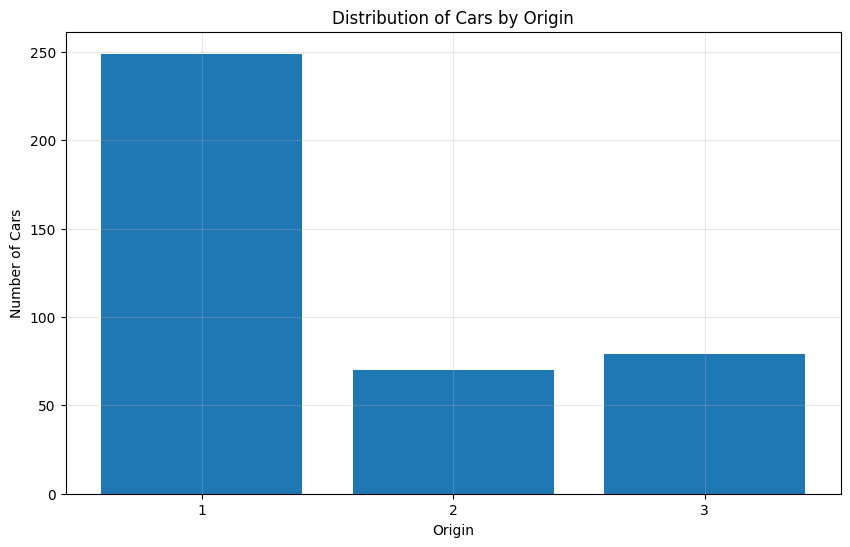

In [22]:
plt.figure(figsize=(10, 6))
car_origin_counts = data['origin'].value_counts().sort_index()
plt.bar(car_origin_counts.index, car_origin_counts.values)
plt.title('Distribution of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Number of Cars')
plt.xticks(car_origin_counts.index)
plt.grid(True, alpha=0.3)
plt.show()

#### 3.7 How do acceleration values vary across different cylinders?
Use a boxplot of acceleration grouped by cylinders.

/tmp/ipykernel_11703/2067500918.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data.cylinders == i]['acceleration'] for i in sorted(data.cylinders.unique())],


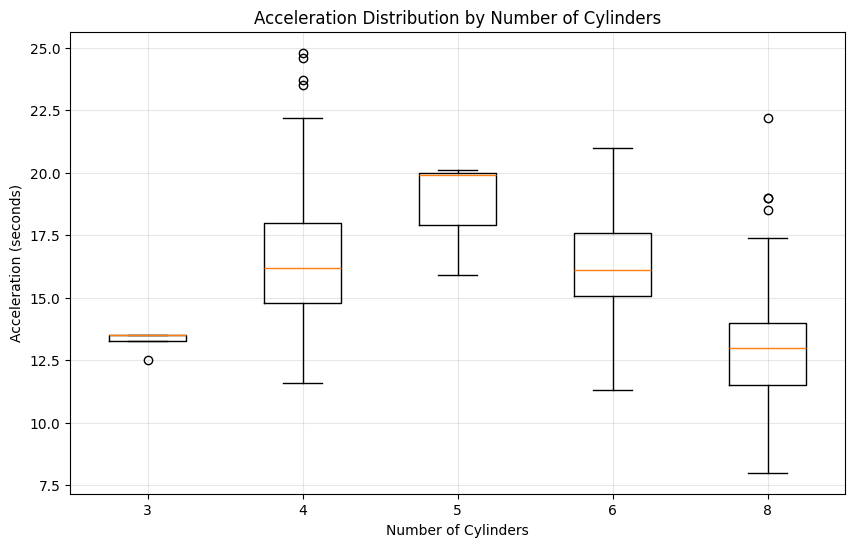

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data.cylinders == i]['acceleration'] for i in sorted(data.cylinders.unique())],
            labels=sorted(data.cylinders.unique()))
plt.title('Acceleration Distribution by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Acceleration (seconds)')
plt.grid(True, alpha=0.3)
plt.show()

#### 3.8 Which year had the most number of car entries?
Plot a histogram or bar chart of car counts by model year.

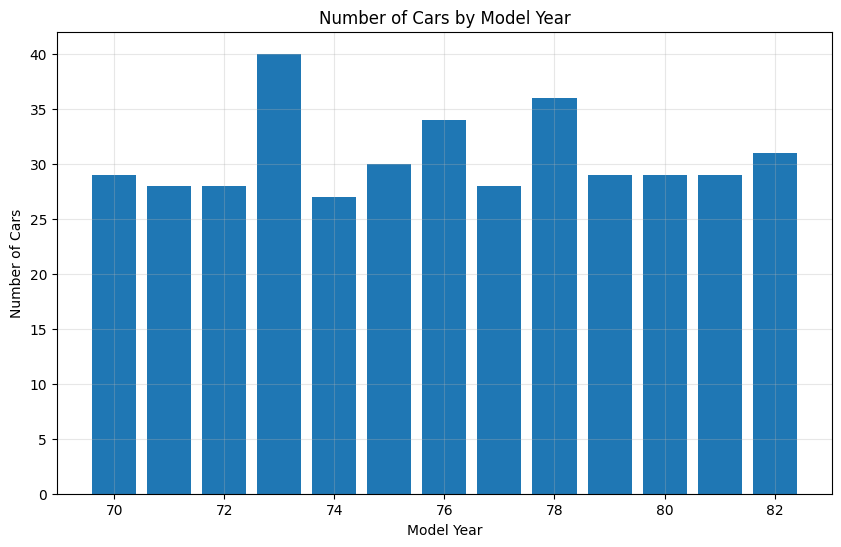

In [25]:
plt.figure(figsize=(10, 6))
car_year_counts = data['model year'].value_counts().sort_index()
plt.bar(car_year_counts.index, car_year_counts.values)
plt.title('Number of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.grid(True, alpha=0.3)
plt.show()

#### 3.9 Is there a clustering pattern among weight, horsepower, and mpg?
Create a 3D scatter plot of these three variables.

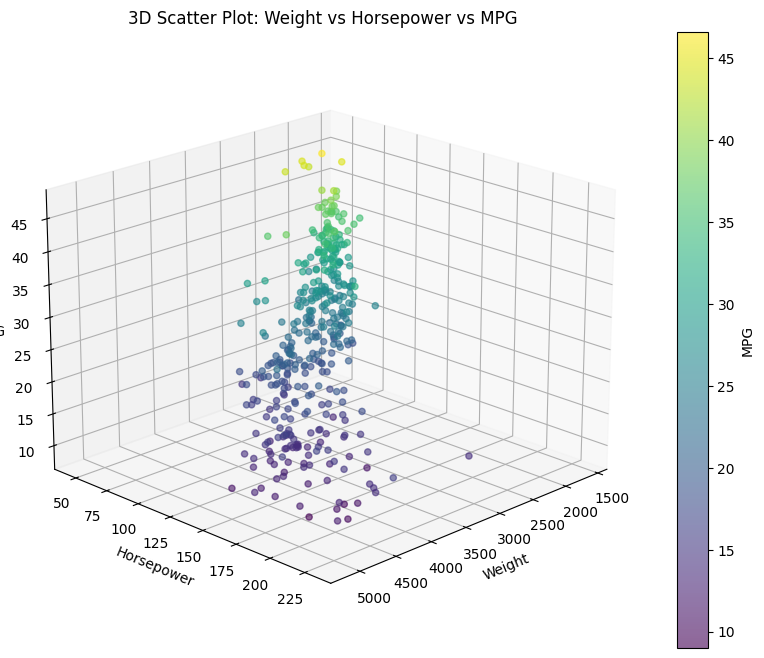

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['weight'], 
                    data['horsepower'], 
                    data['mpg'],
                    c=data['mpg'], 
                    cmap='viridis',
                    alpha=0.6)

ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
ax.set_title('3D Scatter Plot: Weight vs Horsepower vs MPG')

plt.colorbar(scatter, label='MPG')

ax.view_init(elev=20, azim=45)

plt.show()

#### 3.10.Which 10 cars have the bestfuel efficiency?
Plot a horizontal bar chartshowing the top 10 car names with the highest mpg.

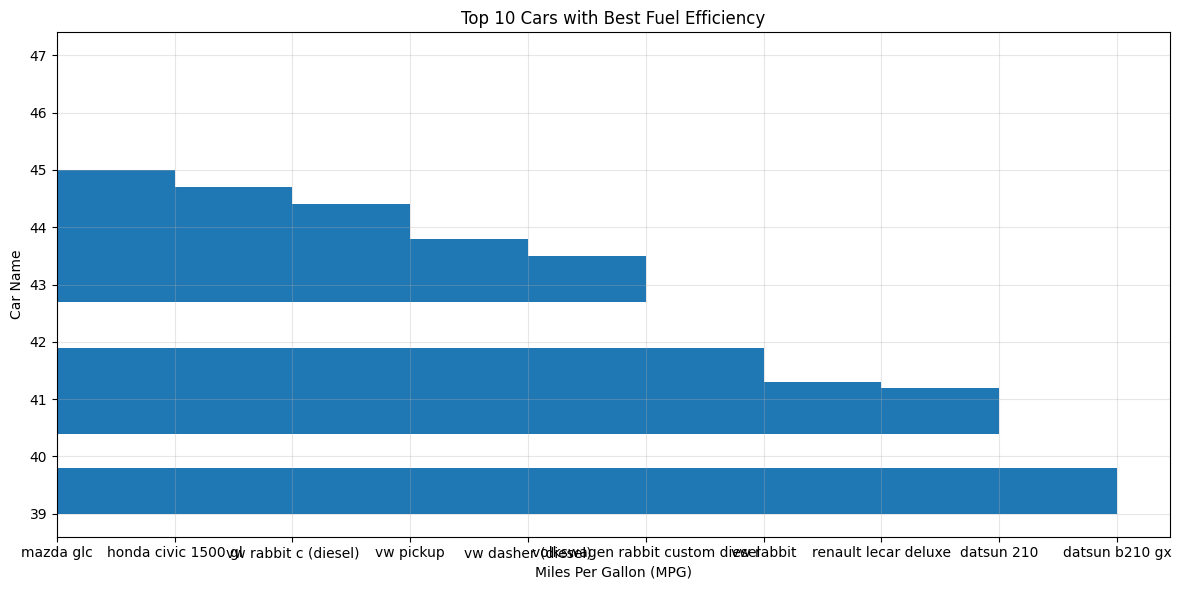

In [ ]:
top_10_cars = data.nlargest(10, 'mpg')[['car name', 'mpg']]

plt.figure(figsize=(12, 6))
plt.barh(top_10_cars['car name'], top_10_cars['mpg'])
plt.title('Top 10 Cars with Best Fuel Efficiency')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Car Name')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()